# Data Extraction - Scrape de Tweets Trending topic 

## Dependencias

In [ ]:
# ejecutar solo cuando se trabaja desde colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pip install snscrape
%pip install pandas
%pip install textblob
%pip install vaderSentiment
%pip install geocoder
%pip install googletrans==4.0.0-rc1
%pip install pymysql
%pip install nltk
%pip install snowballstemmer
%pip install matplotlib
%pip install seaborn
%pip install pyspellchecker
%pip install numpy
%pip install scikit-learn
%pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 3.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 KB 4.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
%pip show snscrape


In [ ]:
import geocoder
# Obtiene la latitud y longitud de la ubicación actual

g = geocoder.ip('181.116.176.67')
lat, lon = g.latlng

# Imprime la latitud y longitud
print('Latitud:', lat)
print('Longitud:', lon)

# Define la región como Argentina
region = 'AR'

## Scrape 

In [ ]:
import snscrape.modules.twitter as sntwitter
from snscrape.modules.twitter import Coordinates
from datetime import datetime, timedelta
limit = 50000
tweets = []
tweet_count = 0


# Crea un objeto Coordinates con las coordenadas de Argentina
loc = lat, lon, km = (-34.6131, -58.3772, '500km')
# Especifica el radio de búsqueda en kilómetros

# Crea la consulta de búsqueda de tweets
# geocode:`{}`'.format(loc)
consulta = '(argentina OR argentina OR argentina) lang:"es-ar" until:' + \
    datetime.now().date().strftime('%Y-%m-%d') + ' since:2023-01-01'
 
# Obtener una lista de todos los trending topics en Argentina
#for tweet in sntwitter.TwitterSearchScraper(query).get_items():
trends = [trend.name for trend in sntwitter.TwitterTrendsScraper().get_items()]
print(len(trends))
#trends = list(trend.name for trend in sntwitter.TwitterTrendsScraper().get_items())
print(trends)
for trend in trends:
    print("Trending topic:", trend)
    
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(f'#{trend} {consulta}').get_items()):
        print(f"Tweet {i+1}: {tweet.date.strftime('%Y-%m-%d'), trend, tweet.rawContent}")
        tweets.append((tweet.date.strftime('%Y-%m-%d'), trend, tweet.rawContent))
        tweet_count += 1
        if len(tweets) >= limit:
          break
    if len(tweets) >= limit:
      break

print(f"Total tweets scraped: {len(tweets)}")
print(f"Total Trends in data scraped: {len(trends)}")

In [ ]:
print(tweets[-5:])

## Diccionario de Tweets

In [ ]:
_dict = {}

for i in range(len(tweets)):
  _dict[i] = tweets[i]

print(len(_dict))

## Crear data Frame

Creacion del Data Frame

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict(_dict, orient='index')

df.columns = ['date', 'trend', 'Content']

print(df)

Guardar el Data Frame en el local content

In [ ]:
import pandas as pd
# df = df.to_csv('G:\\Mi unidad\\mydata_output5.csv')
# df = df.to_csv('/content/drive/MyDrive/mydata_output_primero.csv')
# df = pd.read_csv('G:\\Mi unidad\\mydata_output5.csv')
df = pd.read_csv('/content/drive/MyDrive/mydata_output_primero.csv')
print(df)

In [ ]:
import os
ruta = os.getcwd()
print("El archivo se guardó en la siguiente ruta:", ruta)

# 🛡 Limpieza de Contenido de Tweets 🛡

## 🪛 Ajustes a detalles de los datos provenientes de la BD  🪛

In [ ]:
import re
#df['Trend'] = df['Trend'].str.split().str[0]  # Obtener la primera palabra

#df['Trend'] = df['Trend'].astype(str).apply(lambda x: re.sub(r'[^\w\s]','',x)) # eliminar  

df = df.drop("Unnamed: 0", axis=1) # borra la columna 0 sin nombre 
#df = df.drop("Polarity", axis=1) # borra la columna Polarity
#df = df.drop("Subjectivity", axis=1) # borra la columna Subjectivity

print(df)

          id        date                   Trend  \
0          1  2023-03-19                 LaTorre   
1          2  2023-03-18  inteligenciaartificial   
2          3  2023-03-19            MaríaCeleste   
3          4  2023-03-17               instituto   
4          5  2023-03-18               Instituto   
...      ...         ...                     ...   
49212  50328  2023-03-20           elclubdelmoro   
49213  50329  2023-03-17           elclubdelmoro   
49214  50330  2023-03-16           elclubdelmoro   
49215  50331  2023-03-16           elclubdelmoro   
49216  50332  2023-03-16           elclubdelmoro   

                                                 Content  \
0        disponibles acordes tocar nuevo ft primero link   
1                    feliz cumpleaños mirtha retratos ai   
2      1945 pedro lópez lagar protagonizaban adaptaci...   
3      día hoy recibió visita promoción 1977 arma rec...   
4      peñas espacio vital crecimiento institucional ...   
...            

## 🧹 ♻ Limpieza de los datos ♻ 🧹

In [ ]:
import re
import nltk
from textblob import TextBlob
# python -m textblob.download_corpora
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from spellchecker import SpellChecker
nltk.download('stopwords')
nltk.download('snowball_data')
nltk.download('punkt')


# eliminar las primerad 50280 lineas
# df = df.drop(df.index[:50280])
# print(df)

# Eliminar menciones y hashtags
df['Content'] = df['Content'].astype(str).apply(lambda x: re.sub(r'@\w+|#\w+', '', x))

# Reemplazar emoticones por espacio
df['Content'] = df['Content'].astype(str).apply(lambda x: re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]', ' ', x))


# Eliminar URL y caracteres especiales
df['Content'] = df['Content'].astype(str).apply(lambda x: re.sub(r'http\S+|[^\w\s]+', ' ', x))

# Convertir texto a minúsculas
df['Content'] = df['Content'].astype(str).apply(lambda x: x.lower())

# Eliminar espacios adicionales
df['Content'] = df['Content'].astype(str).apply(lambda x: re.sub(r'\s+', ' ', x).strip())


# Eliminar palabras vacías
stop_words = set(stopwords.words('spanish'))
df['Content'] = df['Content'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Eliminar las filas con None en la columna Content y reindexar
df = df.dropna(subset=['Content']).reset_index(drop=True)

# #  # Stemming 
# stemmer = SnowballStemmer('spanish')
# df['Content'] = df['Content'].astype(str).apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))


# Eliminar filas vacías
#df.drop(df[df['Content'] == ''].index, inplace=True)


print(df)



# # Corregir ortografía
# from typing import Union
# import spellchecker
# import re
# from typing import Union

# def correct_spelling(text, spell):
#     if text is None:
#         return None
#     # Validar el tweet
#     if not is_valid_tweet(text):
#         return text
#     # Tokenizar el texto
#     words = nltk.word_tokenize(text)
#     # Corregir la ortografía de cada palabra
#     corrected_words = [spell.correction(word) for word in words]
#     # Reemplazar las palabras incorrectas por las correctas en el texto
#     for i in range(len(words)):
#         text = re.sub(r'(?i)\b' + words[i] + r'\b', corrected_words[i], text)
#     # Eliminar espacios extras
#     text = re.sub(r'\s+', ' ', text)
#     return text

# spell = SpellChecker(language='es')
# df['Content'] = df['Content'].astype(str).apply(lambda x: correct_spelling(is_valid_tweet(x), spell))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package snowball_data to /root/nltk_data...
[nltk_data]   Package snowball_data is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


          id        date                   Trend  \
0          1  2023-03-19                 LaTorre   
1          2  2023-03-18  inteligenciaartificial   
2          3  2023-03-19            MaríaCeleste   
3          4  2023-03-17               instituto   
4          5  2023-03-18               Instituto   
...      ...         ...                     ...   
50325  50328  2023-03-20           elclubdelmoro   
50326  50329  2023-03-17           elclubdelmoro   
50327  50330  2023-03-16           elclubdelmoro   
50328  50331  2023-03-16           elclubdelmoro   
50329  50332  2023-03-16           elclubdelmoro   

                                                 Content  
0        disponibles acordes tocar nuevo ft primero link  
1                    feliz cumpleaños mirtha retratos ai  
2      1945 pedro lópez lagar protagonizaban adaptaci...  
3      día hoy recibió visita promoción 1977 arma rec...  
4      peñas espacio vital crecimiento institucional ...  
...                  


# 🏴 Traducir al Ingles el Data Frame para utilizarlo en el analisis de sentimientos 🏴

In [ ]:
import pandas as pd
from googletrans import Translator
# Crear objeto Translator
translator = Translator()

# # Crear función para traducir texto
# def translate_text(text):
#     try:
#         # Traducir texto a inglés
#         translation = translator.translate(text, dest='en').text
#     except:
#         translation = ""
#     return translation

# # Aplicar función de traducción a la columna "Content"
# df['Translated'] = df['Content'].apply(translate_text)

# # Mostrar DataFrame con las columnas "Content" y "Translated"
# print(df)


import pandas as pd
from googletrans import Translator

# # Crear objeto Translator
# translator = Translator()

# # Crear función para traducir texto
# def translate_text(text):
#     try:
#         # Traducir texto a inglés
#         translation = translator.translate(text, dest='en').text
#     except:
#         translation = ""
#     return translation


# # Dividir DataFrame en lotes de 250 filas
# batch_size = 250
# n_batches = len(df) // batch_size + 1
# batches = [df[i*batch_size:(i+1)*batch_size] for i in range(n_batches)]

# # Crear una lista vacía para almacenar los resultados de la traducción
# translated_texts = []

# # Iterar sobre cada lote y aplicar la función de traducción
# for i, batch in enumerate(batches):
#     print(f"Traduciendo lote {i+1}/{n_batches}")
#     translated_batch = batch['Content'].apply(translate_text)
#     translated_texts.append(translated_batch)

# # Concatenar los resultados de la traducción en un nuevo DataFrame
# translated_df = pd.concat(translated_texts)

# # Agregar los resultados de la traducción al DataFrame original
# df['Translated'] = translated_df

# # Mostrar DataFrame con las columnas "Content" y "Translated"
# print(df)

import os
import pandas as pd
from googletrans import Translator

# Crear objeto Translator
translator = Translator()

# Función para traducir bach
def translate_bach(bach):
    # Crear lista para almacenar las traducciones
    translations = []
    # Recorrer cada fila del bach
    for row in bach:
        try:
            # Traducir texto a inglés
            translation = translator.translate(row, dest='en').text
        except:
            translation = ""
        # Agregar traducción a la lista
        translations.append(translation)
    # Retornar lista de traducciones
    return translations

# Nombre del archivo de entrada
# input_file = 'G:\\Mi unidad\\mydata_output_from_MySQL.csv'
# input_file = '/content/drive/MyDrive/mydata_output_from_MySQL.csv'

# Leer archivo de entrada
# df = pd.read_csv(input_file)

# Nombre base del archivo de salida
output_base_name = "translated_data_"

# Si hay archivos de salida previos, obtener el número del último archivo procesado
last_index = 0
for filename in os.listdir("."):
    if filename.startswith(output_base_name):
        last_index = max(last_index, int(filename[len(output_base_name):-4]))

# Dividir DataFrame en bachs de 250 filas
batch_size = 250
n_batches =  len(df) // batch_size + 1
batches = [df[i*batch_size:(i+1)*batch_size] for i in range(n_batches)]
# Procesar cada bach y guardar los resultados en un archivo físico
for i, batch in enumerate(batches[last_index:]):
    # Traducir bach
    translated = translate_bach(batch["Content"])
    # Crear DataFrame con las traducciones y guardar en un archivo físico
    df_translated = pd.DataFrame({"Content": batch["Content"], "Translated": translated})
    df_translated.to_csv(f"{output_base_name}{i+last_index}.csv", index=False)
    # Imprimir mensaje de progreso
    print(f"Batch {i+last_index}/{len(batches)} processed and saved to {output_base_name}{i+last_index}.csv")

# Leer todos los archivos guardados y concatenarlos en un único DataFrame
df_all = pd.concat([pd.read_csv(filename) for filename in os.listdir(".") if filename.startswith(output_base_name)])

# Eliminar archivos de baches individuales
for filename in os.listdir("."):
    if filename.startswith(output_base_name):
        os.remove(filename)

# Mostrar DataFrame con los datos traducidos
print(df_all)

# 🏹 Análisis de sentimientos 🏹

In [ ]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# def get_polarity(text):
#     sentiment = analyzer.polarity_scores(text)
#     return sentiment['compound']

# df['polarity'] = df['Content'].apply(get_polarity)

# def get_subjectivity(text):
#     blob = TextBlob(text)
#     subjectivity = blob.sentiment.subjectivity
#     return subjectivity

# df['subjectivity'] = df['Content'].apply(get_subjectivity)

from textblob import TextBlob

list_polarid = []
list_subject = []

for i,row in df.iterrows():
  #Take text 
  text = row['Content']

  #Creat Object TextBlob
  blob = TextBlob(text)
  polarid, subjectividad = blob.sentiment 
  list_polarid.append(polarid)
  list_subject.append(subjectividad)

df['Polarity'] = list_polarid
df['Subjectivity'] = list_subject

print(df)

          id        date                   Trend  \
0          1  2023-03-19                 LaTorre   
1          2  2023-03-18  inteligenciaartificial   
2          3  2023-03-19            MaríaCeleste   
3          4  2023-03-17               instituto   
4          5  2023-03-18               Instituto   
...      ...         ...                     ...   
50325  50328  2023-03-20           elclubdelmoro   
50326  50329  2023-03-17           elclubdelmoro   
50327  50330  2023-03-16           elclubdelmoro   
50328  50331  2023-03-16           elclubdelmoro   
50329  50332  2023-03-16           elclubdelmoro   

                                                 Content  Polarity  \
0        disponibles acordes tocar nuevo ft primero link       0.0   
1                    feliz cumpleaños mirtha retratos ai       0.0   
2      1945 pedro lópez lagar protagonizaban adaptaci...       0.0   
3      día hoy recibió visita promoción 1977 arma rec...       0.0   
4      peñas espacio vita

# 💟 Resultados preliminares del Análisis de Sentimientos 💟

In [ ]:
# Get the most frequent trending or tending topic from the extracted tweets
most_frequent_trend = df['Trend'].value_counts().index[0]

# Print the most frequent trend
print(f"The most frequent trend is: {most_frequent_trend}")

promedio_polarid = df['Polarity'].mean()
promedio_subjectividad = df['Subjectivity'].mean()
trend = most_frequent_trend
# Print the dataframe and sentiment analysis results
print(df)
df.describe
print(f"Average Polarity: {promedio_polarid}")
print(f"Average Subjectivity: {promedio_subjectividad}")
if promedio_polarid > 0:
    print(f"{trend} caused good feelings!")
elif promedio_polarid < 0:
    print(f"{trend} caused bad feelings.")
else:
    print(f"{trend} did not have a significant impact on feelings.") 


          id        date                   Trend  \
0          1  2023-03-19                 LaTorre   
1          2  2023-03-18  inteligenciaartificial   
2          3  2023-03-19            MaríaCeleste   
3          4  2023-03-17               instituto   
4          5  2023-03-18               Instituto   
...      ...         ...                     ...   
49212  50328  2023-03-20           elclubdelmoro   
49213  50329  2023-03-17           elclubdelmoro   
49214  50330  2023-03-16           elclubdelmoro   
49215  50331  2023-03-16           elclubdelmoro   
49216  50332  2023-03-16           elclubdelmoro   

                                                 Content  \
0        disponibles acordes tocar nuevo ft primero link   
1                    feliz cumpleaños mirtha retratos ai   
2      1945 pedro lópez lagar protagonizaban adaptaci...   
3      día hoy recibió visita promoción 1977 arma rec...   
4      peñas espacio vital crecimiento institucional ...   
...            

# 💽 Creacion y carga de BD *MySQL* desde colab 💽

In [ ]:
%pip install pymysql

import pymysql

# Especifica los detalles de la conexión
host = '0.tcp.sa.ngrok.io'
port = 19504
user = 'root'
password = ''
database = 'ramon'

# Crea la conexión
cnx = pymysql.connect(host=host, port=port, user=user, password=password, database=database)

# Crear un cursor
cursor = cnx.cursor()

cnx.begin

# Borrar la tabla y crear la tabla
#cursor.execute("DROP TABLE IF EXISTS analisis_sentimientos")
#cursor.execute("CREATE TABLE analisis_sentimientos (id INT AUTO_INCREMENT PRIMARY KEY, date DATE, Trend TEXT, Content TEXT, Polarity FLOAT, Subjectivity FLOAT)")
#cnx.commit()

# Agregar la columna Translated al DataFrame si es necesario
# df['Translated'] = ...

# Consultar la última fila insertada en la tabla analisis_sentimientos
cursor.execute("SELECT * FROM analisis_sentimientos ORDER BY id DESC LIMIT 1;")
result = cursor.fetchone()   #None
print(result)
# Si se encontró una fila, obtener su índice para comenzar la carga desde la siguiente
if result:
    last_id = result[0]
    start_index = df.index.get_loc(last_id) + 1
else:
    start_index = 0

# Cargar los datos en lotes
batch_size = 100
end_index = start_index + batch_size

while start_index < len(df):
    try: # Cargar el lote de filas
      for row in df[start_index:end_index].itertuples():
        # Realizar el análisis de sentimientos y guardar los resultados en la base de datos  
        cursor.execute("INSERT INTO analisis_sentimientos (date, Trend, Content, Polarity, Subjectivity) VALUES (%s, %s, %s, %s, %s)", (row[2], row[3], row[4], row[5], row[6]))
        cnx.commit()
      # Actualizar los índices para el siguiente lote
      start_index = end_index
      end_index = min(end_index + batch_size, len(df))
    except pymysql.OperationalError as e:
      print(f"Error: {e}")
      print("Reconectando a la base de datos...")
      cnx.rollback()
      cnx = pymysql.connect(host=host, port=port, user=user, password=password, database=database)
      cnx.begin      
    # try: 
    #   for row in df[start_index:end_index].itertuples():
    #     cursor.execute("INSERT INTO analisis_sentimientos (Content, Polarid, Subjectividad) VALUES (%s, %s, %s)", (row[2], row[3], row[4]))
    #     cnx.commit()
    #   # Actualizar los índices para el siguiente lote
    #   start_index = end_index
    #   end_index = min(end_index + batch_size, len(df))
    # except pymysql.OperationalError as e:
    #   print(f"Error: {e}")
    #   print("Reconectando a la base de datos...")
    #   cnx.rollback()
    #   cnx = pymysql.connect(host=host, port=port, user=user, password=password, database=database)  

# Ejecutar una consulta
# cursor.execute("SELECT * FROM tabla")

# # Obtener los resultados
results = cursor.fetchall()

# # Imprimir los resultados
for row in results:
  print(row)

# Cerrar la conexión a la base de datos
cursor.close()

cnx.close()  

# Convertir el DataFrame en una lista de tuplas
#data = df.values.tolist()
# data = [tuple(row) for row in df.values]
# data = [tuple(x) for x in df.to_numpy()]
# print(data[ -5: ])
# Insertar los datos en la tabla
# Cargar los datos en la base de datos
# try:
#   for row in data:
#       cursor.execute("INSERT INTO analisis_sentimientos (Content, Polarid, Subjectividad) VALUES (%s, %s, %s)", (row[2], row[3], row[4]))
#       cnx.commit()
# except pymysql.OperationalError as e:
#   print(f"Error: {e}")
#   print("Reconectando a la base de datos...")
#   cnx.rollback()
#   cnx = pymysql.connect(host=host, port=port, user=user, password=password, database=database)
#   for row in data:
#       cursor.execute("INSERT INTO analisis_sentimientos (Content, Polarid, Subjectividad) VALUES (%s, %s, %s)", (row[2], row[3], row[4]))
#       cnx.commit()  
# Ejecutar una consulta
# cursor.execute("SELECT * FROM tabla")

# Obtener los resultados
# results = cursor.fetchall()

# Imprimir los resultados
# for row in results:
#     print(row)

# Cerrar la conexión a la base de datos
# cursor.close()

# cnx.close()

# 💽 Creacion y carga de BD desde local 💽

In [ ]:
%pip install pymysql
import pymysql
import pandas as pd

# Especifica los detalles de la conexión
# host = '127.0.0.1'
# port = 3306
# user = 'root'
# password = ''
# database = 'ramon'
host = '0.tcp.sa.ngrok.io'
port = 19504
user = 'root'
password = ''
database = 'ramon'

# Crea la conexión
cnx = pymysql.connect(host=host, port=port, user=user, password=password, database=database)

# Crear un cursor
cursor = cnx.cursor()

cnx.begin
# cnx.rollback()

# para reenumerar las fila id de la tabla cuando limpiamos la data 
# cursor.execute("ALTER TABLE analisis_sentimientos ADD COLUMN new_id INT")
# cursor.execute("SET @row_number=0")
# cursor.execute("UPDATE analisis_sentimientos SET new_id = (@row_number:=@row_number+1)")
# cursor.execute("ALTER TABLE analisis_sentimientos DROP COLUMN id")
# cursor.execute("ALTER TABLE analisis_sentimientos CHANGE new_id id INT AUTO_INCREMENT PRIMARY KEY")
# cursor.execute("ALTER TABLE analisis_sentimientos MODIFY COLUMN id INT AUTO_INCREMENT FIRST")
# para borrar registros o tweets repetidos o tweets con el  mismo contenido
# cursor.execute("DELETE t1 FROM analisis_sentimientos t1 INNER JOIN analisis_sentimientos t2 WHERE t1.id < t2.id AND t1.Content=t2.Content")
# para borrar registros en masa cuando no te sirven desde registrox hasta  registroy
# cursor.execute("DELETE FROM analisis_sentimientos WHERE id >= registrox AND id <= registroy")
# para colocar la columna Trend en la tabla  y colocarle valor al trend en cada fila 
# cursor.execute("ALTER TABLE analisis_sentimientos ADD Trend VARCHAR(255)")
# cursor.execute("UPDATE analisis_sentimientos SET Trend = SUBSTRING(Content, LOCATE('#', Content) + 1) WHERE LOCATE('#', Content) > 0")
# para colocar la columna date
# cursor.execute("ALTER TABLE analisis_sentimientos ADD date DATE")
# cursor.execute("UPDATE analisis_sentimientos SET date = DATE_ADD('2023-03-17', INTERVAL FLOOR(RAND() * DATEDIFF('2023-03-20', '2023-03-17')) DAY)")
# camvbia el lugar de date y Trend en la tabla
# cursor.execute("ALTER TABLE analisis_sentimientos MODIFY COLUMN date DATE AFTER id")
# cursor.execute("ALTER TABLE analisis_sentimientos MODIFY COLUMN Trend VARCHAR(255) AFTER date")
# Cambia el nombre de polarid a Polarity y subjectividad a Subjectivity
# cursor.execute("ALTER TABLE analisis_sentimientos CHANGE polarid Polarity INT")
# cursor.execute("ALTER TABLE analisis_sentimientos CHANGE subjectividad Subjectivity INT")

# Crear un DataFrame vacío
df = pd.DataFrame()

# Escribir la consulta SQL
consulta = 'SELECT * FROM analisis_sentimientos'

# Leer los datos de la consulta SQL y almacenarlos en el DataFrame
df = pd.read_sql(consulta, cnx)

# cnx.commit()
# Obtener los resultados
# results = cursor.fetchall()

# Imprimir los resultados
# for row in results:
#     print(row)

# Cerrar la conexión a la base de datos
cursor.close()

cnx.close()

# 💿 💾 Guardado en archivo físico y lectura desde archivo físico 💿 💾

In [ ]:
import pandas as pd
# Guardar en CSV 
# df.to_csv('G:\\Mi unidad\\mydata_output5.csv')
# df.to_csv('/content/drive/MyDrive/mydata_output_primero.csv')

# Leer desde CSV
#df = pd.read_csv('G:\\Mi unidad\\mydata_output_DEFINITIVO.csv')

df = pd.read_csv('/content/drive/MyDrive/mydata_output_DEFINITIVO.csv')
df = df.drop("Unnamed: 0", axis=1) # borra la columna 0 sin nombre 
print(df)
df.dtypes

          id        date                   Trend  \
0          1  2023-03-19                 LaTorre   
1          2  2023-03-18  inteligenciaartificial   
2          3  2023-03-19            MaríaCeleste   
3          4  2023-03-17               instituto   
4          5  2023-03-18               Instituto   
...      ...         ...                     ...   
49212  50328  2023-03-20           elclubdelmoro   
49213  50329  2023-03-17           elclubdelmoro   
49214  50330  2023-03-16           elclubdelmoro   
49215  50331  2023-03-16           elclubdelmoro   
49216  50332  2023-03-16           elclubdelmoro   

                                                 Content  \
0        disponibles acordes tocar nuevo ft primero link   
1                    feliz cumpleaños mirtha retratos ai   
2      1945 pedro lópez lagar protagonizaban adaptaci...   
3      día hoy recibió visita promoción 1977 arma rec...   
4      peñas espacio vital crecimiento institucional ...   
...            

id                int64
date             object
Trend            object
Content          object
Translated       object
Polarity        float64
Subjectivity    float64
dtype: object

#Pruebas 🧪 🧑

In [ ]:
import datetime
import snscrape.modules.twitter as sntwitter
import pandas as pd
from textblob import TextBlob

# Define the start and end dates for tweet extraction
today = datetime.datetime.now().date()
start_date = datetime.datetime.combine(today, datetime.time.min)
end_date = datetime.datetime.now()

# Create an empty dictionary to store the extracted tweets
tweets_dict = {}

# Define the number of tweets to extract for each trending topic
max_tweets_per_trend = 5

# Extract tweets for the top 10 trending topics
trends = list(trend.name for trend in sntwitter.TwitterTrendsScraper().get_items())
print(trends)
tweets_extracted = 0
for trend in trends:
    tweet_count = 0
    for tweet in sntwitter.TwitterSearchScraper(f"#{trend} since:{start_date.date()} until:{end_date.strftime('%Y-%m-%d %H:%M:%S')}").get_items():
        tweets_dict[tweets_extracted] = {'Trend': trend.name, 'Date': datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"), 'Content': tweet.content}
        tweet_count += 1
        tweets_extracted += 1
        if tweet_count >= max_tweets_per_trend:
            break
        if tweets_extracted >= max_tweets_per_trend*10:
            break
    if tweets_extracted >= max_tweets_per_trend*10:
        break

# Create a dataframe from the extracted tweets dictionary
df = pd.DataFrame.from_dict(tweets_dict, orient='index', columns=['Trend', 'Date', 'Content'])

#translate dataframe and  add a new column called Translated
%pip install googletrans==4.0.0-rc1
from googletrans import Translator
translator = Translator()
df['Translated'] = df['Content'].apply(lambda x: translator.translate(x).text)
print(df)

# Perform sentiment analysis on each tweet
polarities = []
subjectivities = []
for text in df['Translated']:
    blob = TextBlob(text)
    polarities.append(blob.sentiment.polarity)
    subjectivities.append(blob.sentiment.subjectivity)

# Add the polarity and subjectivity columns to the dataframe
df['Polarity'] = polarities
df['Subjectivity'] = subjectivities

# Calculate the average polarity and subjectivity for the tweets
avg_polarity = df['Polarity'].mean()
avg_subjectivity = df['Subjectivity'].mean()

# Print the dataframe and sentiment analysis results
print(df)
print(f"Average Polarity: {avg_polarity}")
print(f"Average Subjectivity: {avg_subjectivity}")
if avg_polarity > 0:
    print(f"The tweets caused good feelings!")
elif avg_polarity < 0:
    print(f"The tweets caused bad feelings.")
else:
    print(f"The tweets did not have a significant impact on feelings.")

# ✔ 💻 RESULTADOS ✔ 💻

Análisis exploratorio de Datos EDA, Univariado y Bivariado.

##  💽 💾 Extraer la data de la BD MySQL y almacenar en un Data Frame 💽 💾

In [ ]:
import pandas as pd
import pymysql
# Crea la conexión

#Especifica los detalles de la conexión
host = '0.tcp.sa.ngrok.io'
port = 19785
user = 'root'
password = ''
database = 'ramon'
# host = '127.0.0.1'
# port = 3306
# user = 'root'
# password = ''
# database = 'ramon'


cnx = pymysql.connect(host=host, port=port, user=user, password=password, database=database)

# Crear un cursor
cursor = cnx.cursor()

cnx.begin

# Conectar a la base de datos
# Escribir la consulta SQL
consulta = 'SELECT * FROM analisis_sentimientos'

# Leer los datos de la consulta SQL y almacenarlos en el DataFrame
df = pd.read_sql(consulta, cnx)

# almacenar df en csv local
df.to_csv('G:\\Mi unidad\\mydata_output_from_MySQL.csv')
#df.to_csv('/content/drive/MyDrive/mydata_output_from_MySQL.csv')
# Cerrar la conexión a la base de datos
cursor.close()
cnx.close()

/usr/local/lib/python3.9/dist-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


## Preparacion y filtrado de la data para Visualización

In [ ]:
# Contar el número de registros con Polarity positivo y negativo
num_positivos = (df['Polarity'] > 0).sum()
num_negativos = (df['Polarity'] < 0).sum()
num_neutrales = (df['Polarity'] == 0).sum()
# Calcular el porcentaje de cada tipo de sentimiento
porcentaje_positivos = num_positivos / len(df) * 100
porcentaje_negativos = num_negativos / len(df) * 100
porcentaje_neutrales = num_neutrales / len(df) * 100


## Bar & Pie Charts 📊
1-.📊 Bar chart con Tweets de Trends más comunes. 
2-.📊 Bar chart con Indice Polarity/Subjectivity de los trends mas comunes. 
3-.📊 Pie chart con Porcentaje de Sentimientos positivos y negativos entre losvTrends mas comunes. 

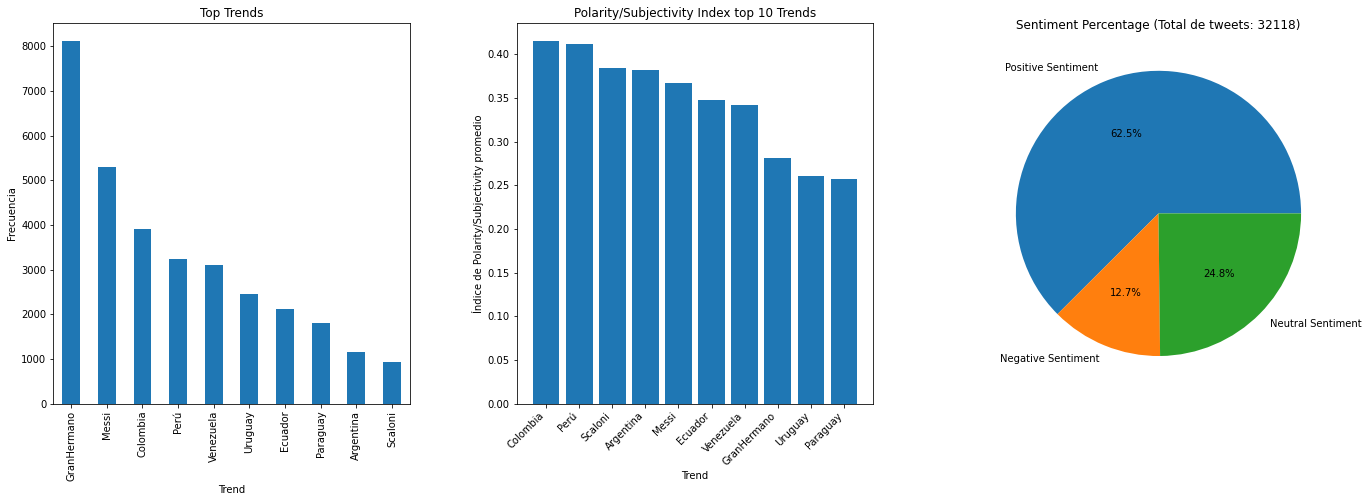

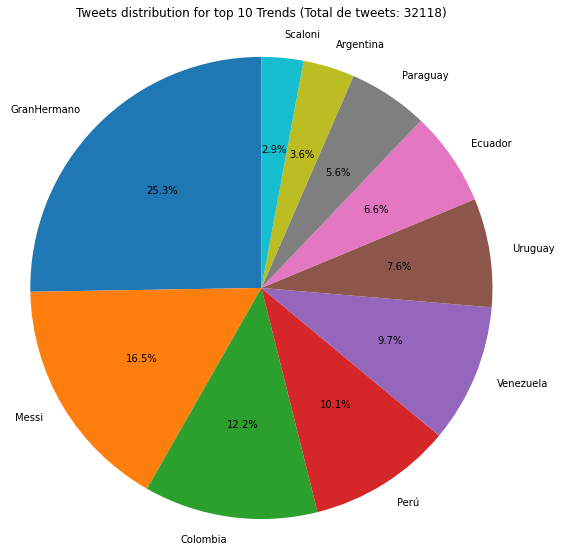

In [ ]:

import matplotlib.pyplot as plt

# Obtener los 10 Trend más comunes
trends_comunes = df['Trend'].value_counts().head(10)
# Crear una lista con los datos para el gráfico de pie
datos_pie = [porcentaje_positivos, porcentaje_negativos, porcentaje_neutrales]
# Crear una lista con los labels para el gráfico de pie
labels_pie = ['Positive Sentiment', 'Negative Sentiment', 'Neutral Sentiment']

# calcular el número total de tweets en los top 10 trends
total_tweets_top_trends = df_top_trends.shape[0]
# obtener los Trend más frecuentes (los 10 primeros)
top_trends = df['Trend'].value_counts().head(10).index.tolist()

# filtrar los datos solo para los Trend más frecuentes
df_top_trends = df[df['Trend'].isin(top_trends)]

# calcular el índice de Polarity/Subjectivity promedio para cada Trend
df_top_trends_grouped = df_top_trends.groupby('Trend').mean().reset_index()

# # ordenar los Trend según índice de Polarity/Subjectivity promedio
df_top_trends_grouped['Polarity_Subjectivity_Ratio'] = df_top_trends_grouped['Polarity'] / df_top_trends_grouped['Subjectivity']
df_top_trends_grouped = df_top_trends_grouped.sort_values(by='Polarity_Subjectivity_Ratio', ascending=False)

# graficar el índice de Polarity/Subjectivity promedio para cada Trend
import matplotlib.pyplot as plt


# Crear una figura con tres subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(23, 7))

# Gráfico de barras con los 10 Trend más comunes
trends_comunes.plot(kind='bar', ax=ax1)
ax1.set_title('Top Trends')
ax1.set_xlabel('Trend')
ax1.set_ylabel('Frecuencia')

# Gráfico de índice de Polarity/Subjectivity promedio para los Trend más frecuentes
ax2.bar(df_top_trends_grouped['Trend'], df_top_trends_grouped['Polarity']/df_top_trends_grouped['Subjectivity'])
ax2.set_title('Polarity/Subjectivity Index top 10 Trends')
ax2.set_xlabel('Trend')
ax2.set_ylabel('Índice de Polarity/Subjectivity promedio')
ax2.set_xticklabels(df_top_trends_grouped['Trend'], rotation=45, ha='right')

# Gráfico de pie con el porcentaje de sentimientos positivos y negativos
ax3.pie(datos_pie, labels=labels_pie, autopct='%1.1f%%')
ax3.set_title('Sentiment Percentage (Total de tweets: {})'.format(total_tweets_top_trends))

# Ajustar la distancia entre subplots
plt.subplots_adjust(wspace=0.3)

# Mostrar los gráficos
plt.show()

import matplotlib.pyplot as plt

# calcular el número total de tweets en los top 10 trends
total_tweets_top_trends = df_top_trends.shape[0]

# graficar la proporción de tweets para cada Trend en el top 10
plt.figure(figsize=(8,8))
plt.pie(df_top_trends['Trend'].value_counts(), labels=df_top_trends['Trend'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Tweets distribution for top 10 Trends (Total de tweets: {})'.format(total_tweets_top_trends))
plt.tight_layout()
plt.show()

##  Line plots 📈
Line Plots de Evolución en el tiempo de los trends mas recientes. 

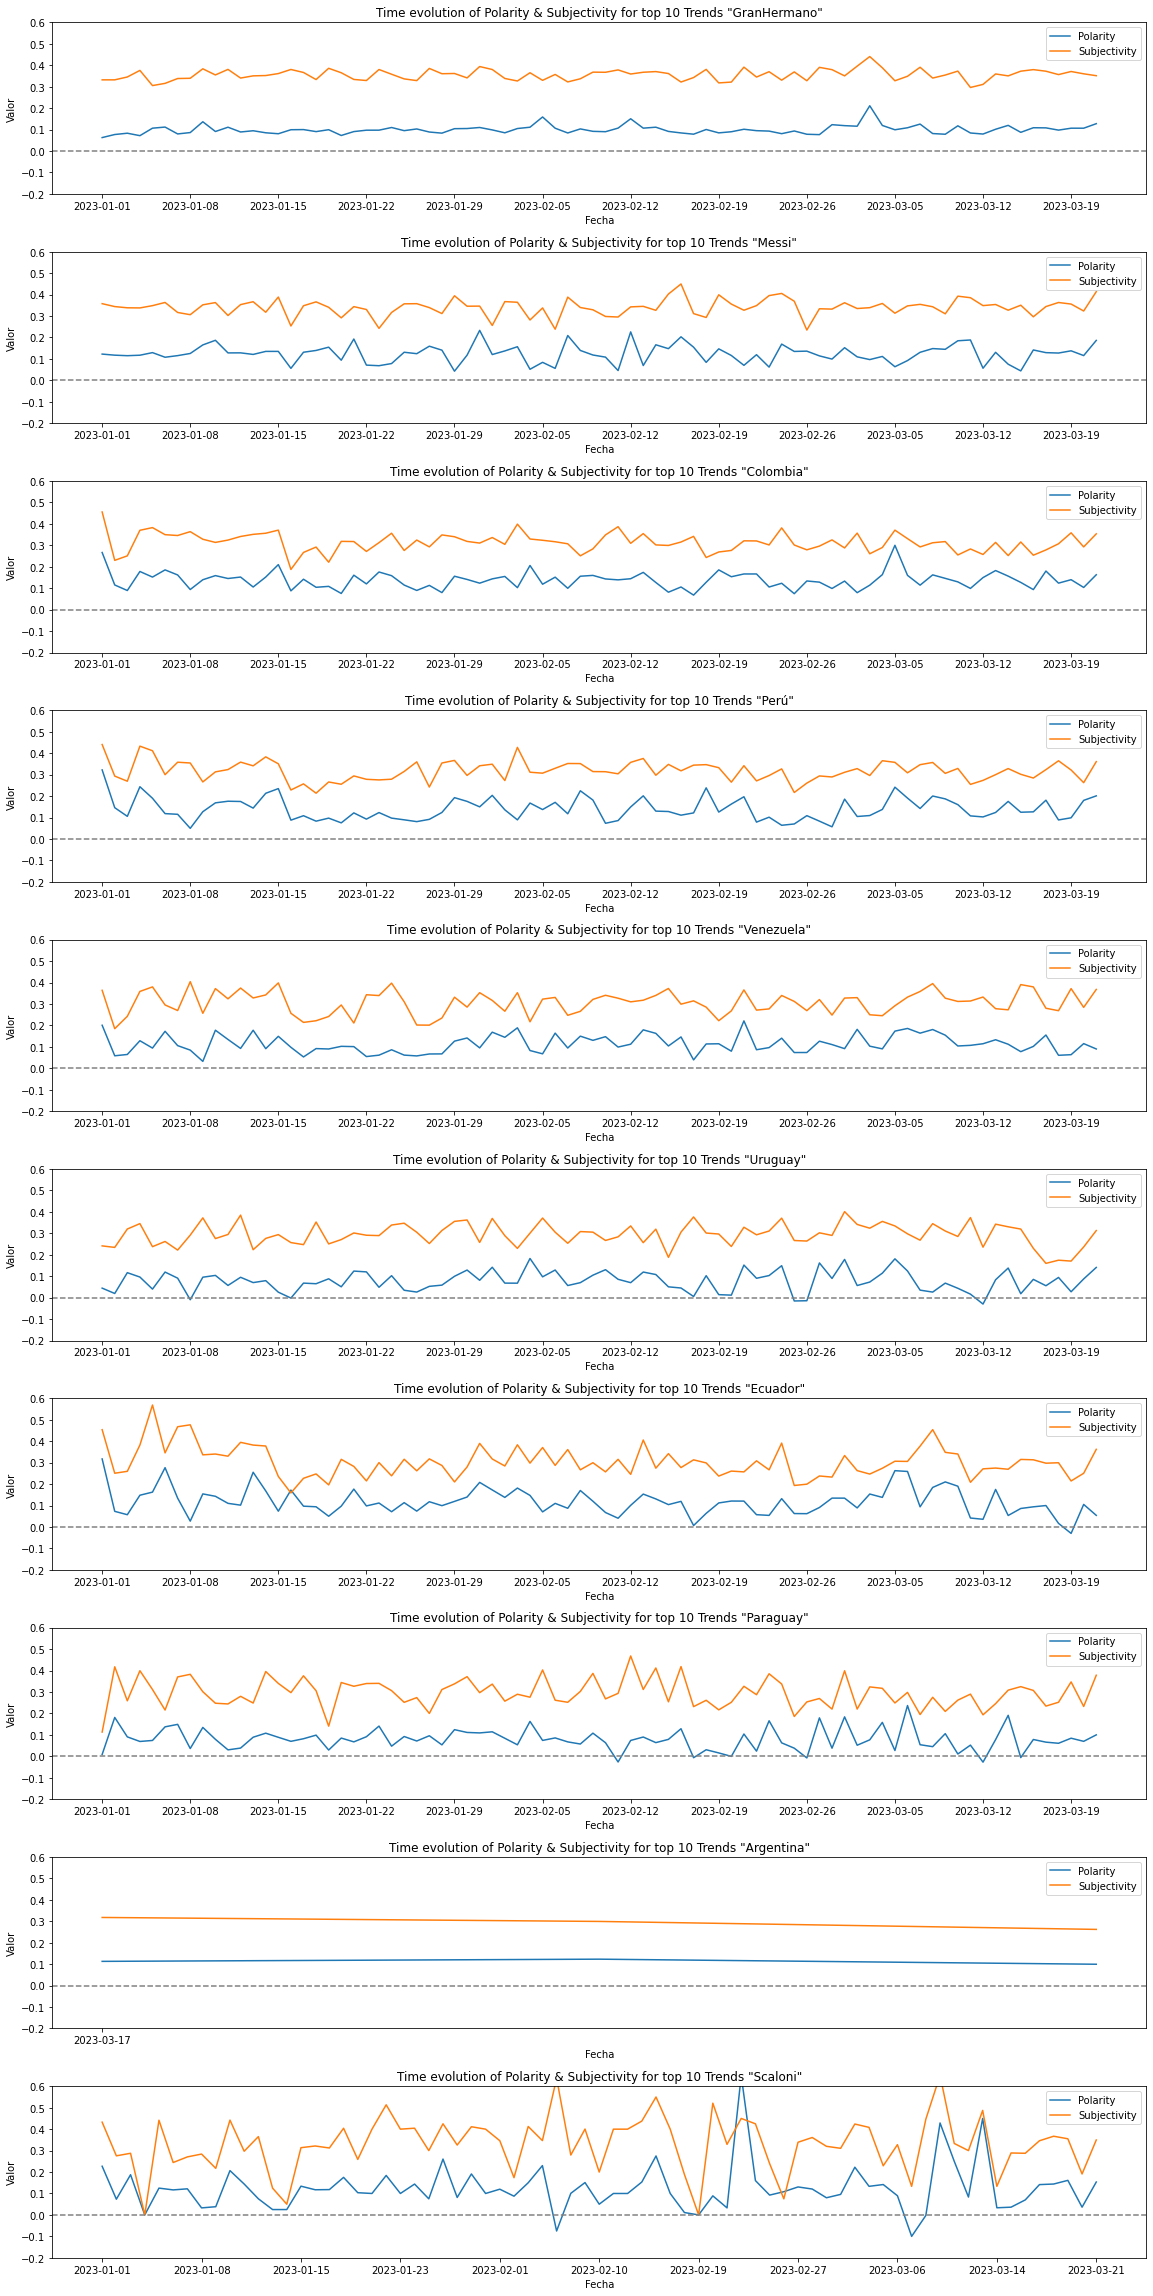

In [ ]:
# Obtener los Trend más frecuentes (los 10 primeros)
top_trends = df['Trend'].value_counts().head(10).index.tolist()

# Agrupar los datos por Trend y por fecha
df_grouped = df.groupby(['Trend', 'date']).mean().reset_index()

# Crear una figura con subplots para cada Trend
fig, axs = plt.subplots(nrows=len(top_trends), ncols=1, figsize=(16, 32))
fig.subplots_adjust(hspace=1.5)


# Iterar sobre los Trends y graficar las curvas de Polarity y Subjectivity en el eje correspondiente
for i, trend in enumerate(top_trends):
    trend_data = df_grouped[df_grouped['Trend'] == trend]
    axs[i].plot(trend_data['date'], trend_data['Polarity'], label='Polarity')
    axs[i].plot(trend_data['date'], trend_data['Subjectivity'],
                label='Subjectivity')
    axs[i].set_title(
        f'Time evolution of Polarity & Subjectivity for top 10 Trends "{trend}"')
    axs[i].set_xlabel('Fecha')
    axs[i].set_ylabel('Valor')
    axs[i].legend()
    axs[i].axhline(y=0, color='gray', linestyle='--')
    axs[i].set_ylim(-0.2, 0.60)

    # Establecer las marcas y etiquetas del eje x
    axs[i].set_xticks(trend_data['date'][::7])
# Ajustar los espacios entre subplots
plt.tight_layout()
# Mostrar el gráfico
plt.show()

## Heat Map 🌡

Heat maps de Polarity y Subjectivity para los Trends más frecuentes.

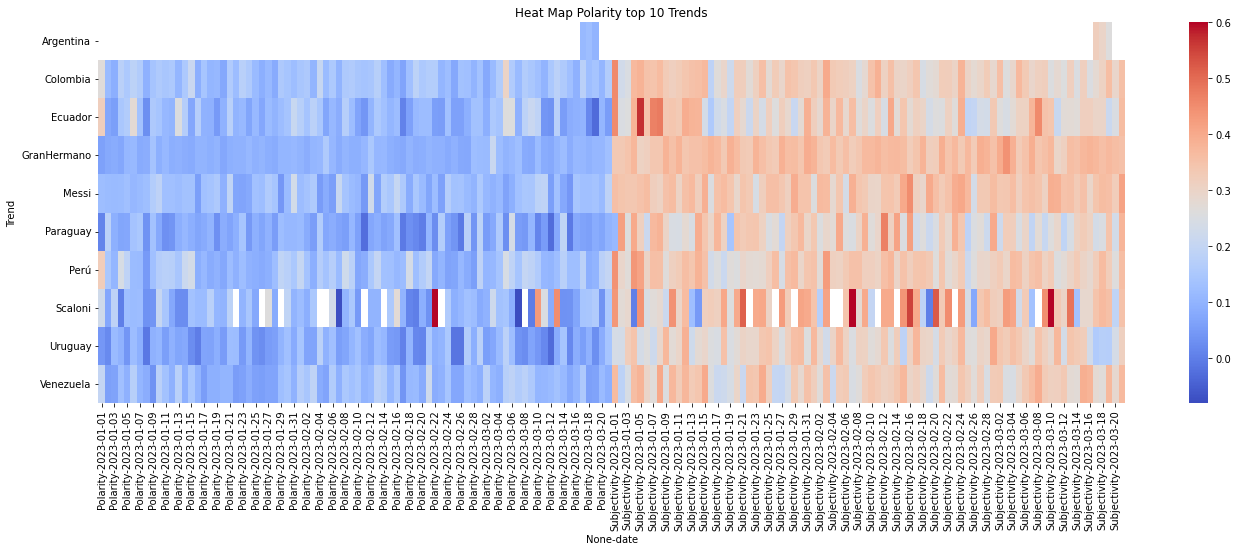

In [ ]:
import seaborn as sns

# obtener los Trend más frecuentes (los 10 primeros)
top_trends = df['Trend'].value_counts().head(10).index.tolist()

# filtrar los datos solo para los Trend más frecuentes
df_top_trends = df[df['Trend'].isin(top_trends)]

# crear un dataframe pivot para visualizar los valores de Polarity y Subjectivity para cada Trend en diferentes fechas
df_pivot = df_top_trends.pivot_table(
    values=['Polarity', 'Subjectivity'], index=['Trend'], columns=['date'])

# graficar el mapa de calor
plt.figure(figsize=(23, 7))
sns.heatmap(df_pivot, cmap='coolwarm', vmin=-0.08, vmax=0.6)
plt.title('Heat Map Polarity top 10 Trends')
plt.show()

## Scatter Plot  ⛓

Scatter plot Subjectivity vs Polarity para los Trends más frecuentes.

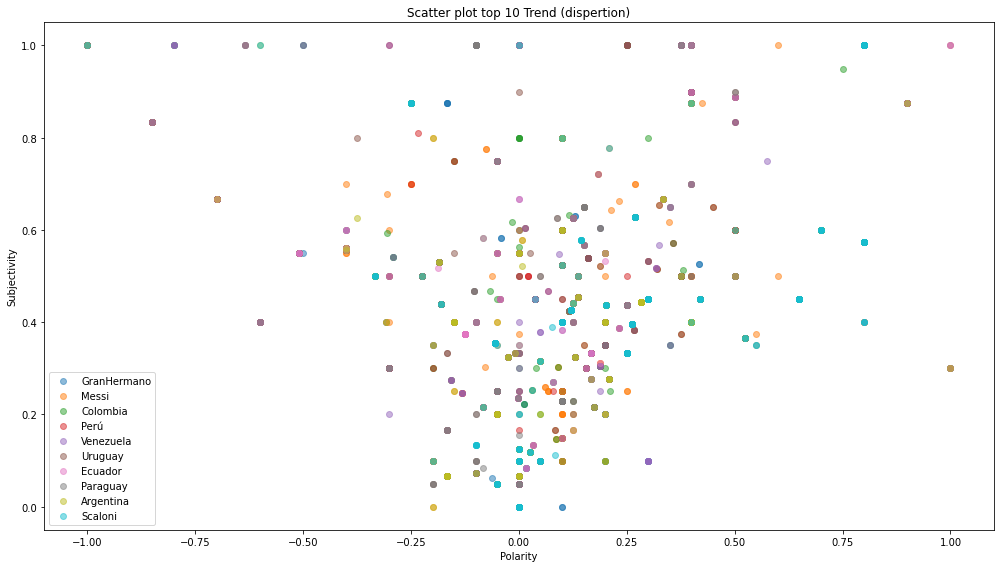

In [ ]:
import seaborn as sns
# Obtener los top 10 Trend
top_trends = df['Trend'].value_counts().head(10).index.tolist()

# Filtrar los datos solo para los top 10 Trend
df_top_trends = df[df['Trend'].isin(top_trends)]

# Crear un diccionario de colores para cada Trend
colors = {trend: sns.color_palette()[i] for i, trend in enumerate(top_trends)}

# Graficar el gráfico de dispersión personalizado
plt.figure(figsize=(14, 8))

for trend in top_trends:
    data = df_top_trends[df_top_trends['Trend'] == trend]
    plt.scatter(data['Polarity'], data['Subjectivity'], color=colors[trend], label=trend, alpha=0.5)

plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Scatter plot top 10 Trend (dispertion)')
plt.legend()
plt.tight_layout()
plt.show()

## Box and whisker plot 🧰 💽
Box and whisker plot de la distribución valores de Polarity para los principales Trends. 

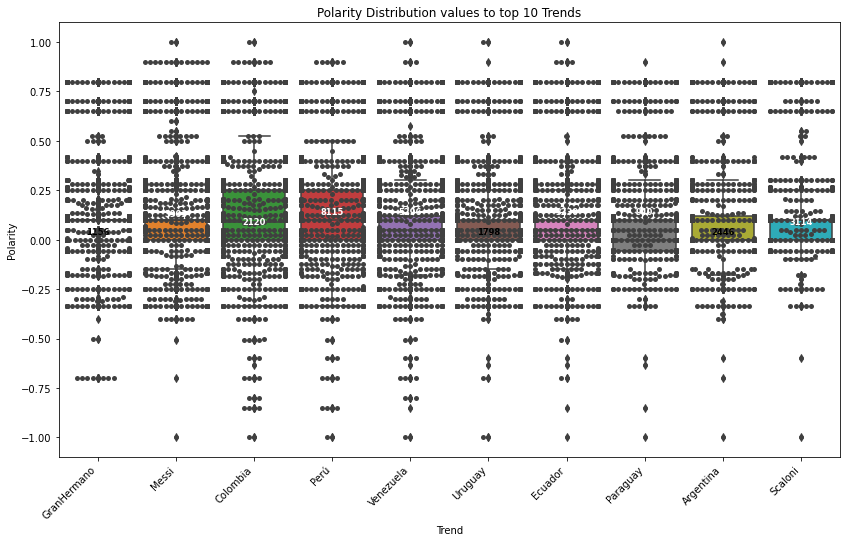

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# obtener los Trend más frecuentes (los 10 primeros)
top_trends = df['Trend'].value_counts().head(10).index.tolist()

# filtrar los datos solo para los Trend más frecuentes
df_top_trends = df[df['Trend'].isin(top_trends)]

# crear gráfico de bigotes para cada Trend en el top 10
plt.figure(figsize=(14,8))
sns.boxplot(x='Trend', y='Polarity', data=df_top_trends, order=top_trends)
sns.swarmplot(x='Trend', y='Polarity', data=df_top_trends, color=".25", order=top_trends)
plt.xlabel('Trend')
plt.ylabel('Polarity')
plt.title('Polarity Distribution values to top 10 Trends')
plt.xticks(rotation=45, ha='right')

# agregar línea para indicar la media de Polarity para cada Trend
medians = df_top_trends.groupby(['Trend'])['Polarity'].median().values
nobs = df_top_trends.groupby('Trend').size().values
nobs = [str(x) for x in nobs.tolist()]
pos = range(len(nobs))

for tick, label in zip(pos, plt.gca().get_xticklabels()):
  # agregar etiquetas con los valores de observación en los gráficos de caja
  plt.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='small', color='w' if medians[tick]>0 else 'k', weight='semibold')

plt.show()

## KDE Plot 📊 📉 🎄

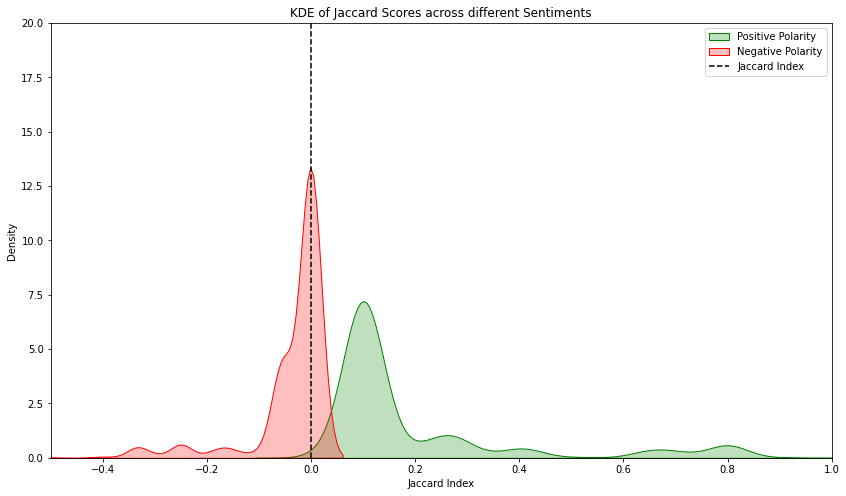

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

# # Supongamos que el dataframe original se llama df y tiene una columna "Polarity"
# df['Sentiment'] = pd.cut(df['Polarity'], bins=[-float('inf'),
#                          0, float('inf')], labels=['Negative', 'Positive'])

# # Separar los datos de polaridad positiva y negativa
# df_positive = df[df['Sentiment'] == 'Positive']
# df_negative = df[df['Sentiment'] == 'Negative']

# # Graficar los kde plots de cada distribución
# sns.kdeplot(df_positive['Polarity'], label='Positive', fill=True)
# sns.kdeplot(df_negative['Polarity'], label='Negative', fill=True)

# # Agregar título y etiquetas de los ejes
# plt.title('KDE of Polarity Scores across different Sentiments')
# plt.xlabel('Polarity')
# plt.ylabel('Density')

# # Mostrar la leyenda
# plt.legend()



# # Importar el dataset
# #df = pd.read_csv('Sentiment.csv')
# # Supongamos que el dataframe original se llama df y tiene una columna "Polarity"
df['Sentiment'] = pd.cut(df['Polarity'], bins=[-float('inf'), 0, float('inf')], labels=['Negative', 'Positive'])
# # Separar los datos de polaridad positiva y negativa
df_positive = df[df['Sentiment'] == 'Positive']
df_negative = df[df['Sentiment'] == 'Negative']

# Calcular el índice de Jaccard
a = len(set(df_positive['Polarity'])) - len(set(df_positive['Polarity']).intersection(set(df_negative['Polarity'])))
b = len(set(df_negative['Polarity'])) - len(set(df_positive['Polarity']).intersection(set(df_negative['Polarity'])))
c = len(set(df_positive['Polarity']).intersection(
    set(df_negative['Polarity'])))
jaccard_index = c / (a + b + c)



# Generar el KDE plot con las dos distribuciones superpuestas
plt.figure(figsize=(14, 8))
sns.kdeplot(df_positive['Polarity'], fill=True,
            color='green', label='Positive Polarity', bw_adjust=1.5)
sns.kdeplot(df_negative['Polarity'], fill=True,
            color='red', label='Negative Polarity', bw_adjust=1.5)
plt.title('KDE of Jaccard Scores across different Sentiments')
plt.xlabel('Jaccard Index')
plt.xlim((-0.5, 1))
plt.ylim((0, 20))
plt.axvline(x=jaccard_index, linestyle='--',
            color='black', label='Jaccard Index')
plt.legend()
plt.show()


## Hexbin Plot 📉
Hexbin plot para Polarity y Subjectivity

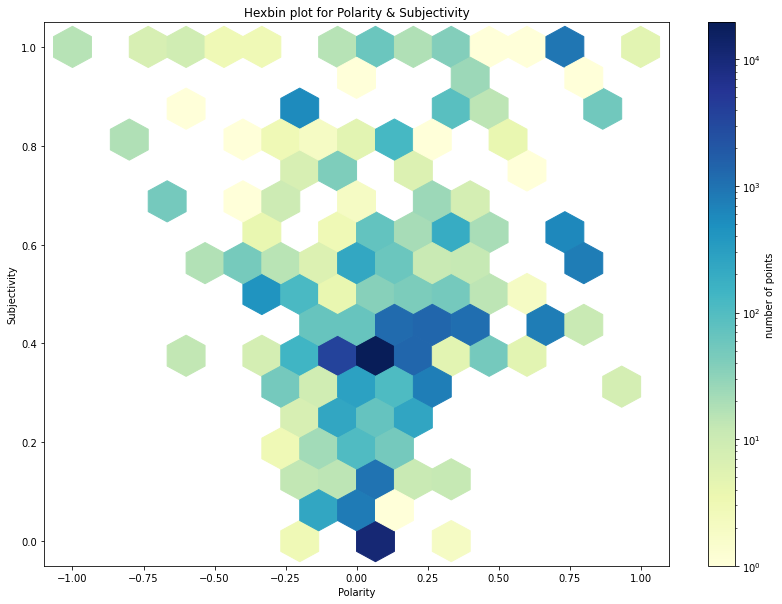

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura de tamaño 10x8
plt.figure(figsize=(14, 10))

# Crear un hexbin plot
plt.hexbin(df['Polarity'], df['Subjectivity'],
           gridsize=15, cmap='YlGnBu', bins='log')

# Añadir etiquetas y título
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Hexbin plot for Polarity & Subjectivity')

# Añadir una barra de color
cb = plt.colorbar()
cb.set_label('number of points')

# Mostrar el plot
plt.show()

## CMap 📉 📈
Cmap de palabras Positivas, Negativas y Neutrales mas frecuentes 📉 📈

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ramon\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\ramon\AppData\Local\Temp\ipykernel_21440\936677554.py:62: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pos_cmap = plt.cm.get_cmap('Greens')
C:\Users\ramon\AppData\Local\Temp\ipykernel_21440\936677554.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  neg_cmap = plt.cm.get_cmap('Reds')
C:\Users\ramon\AppData\Local\Temp\ip

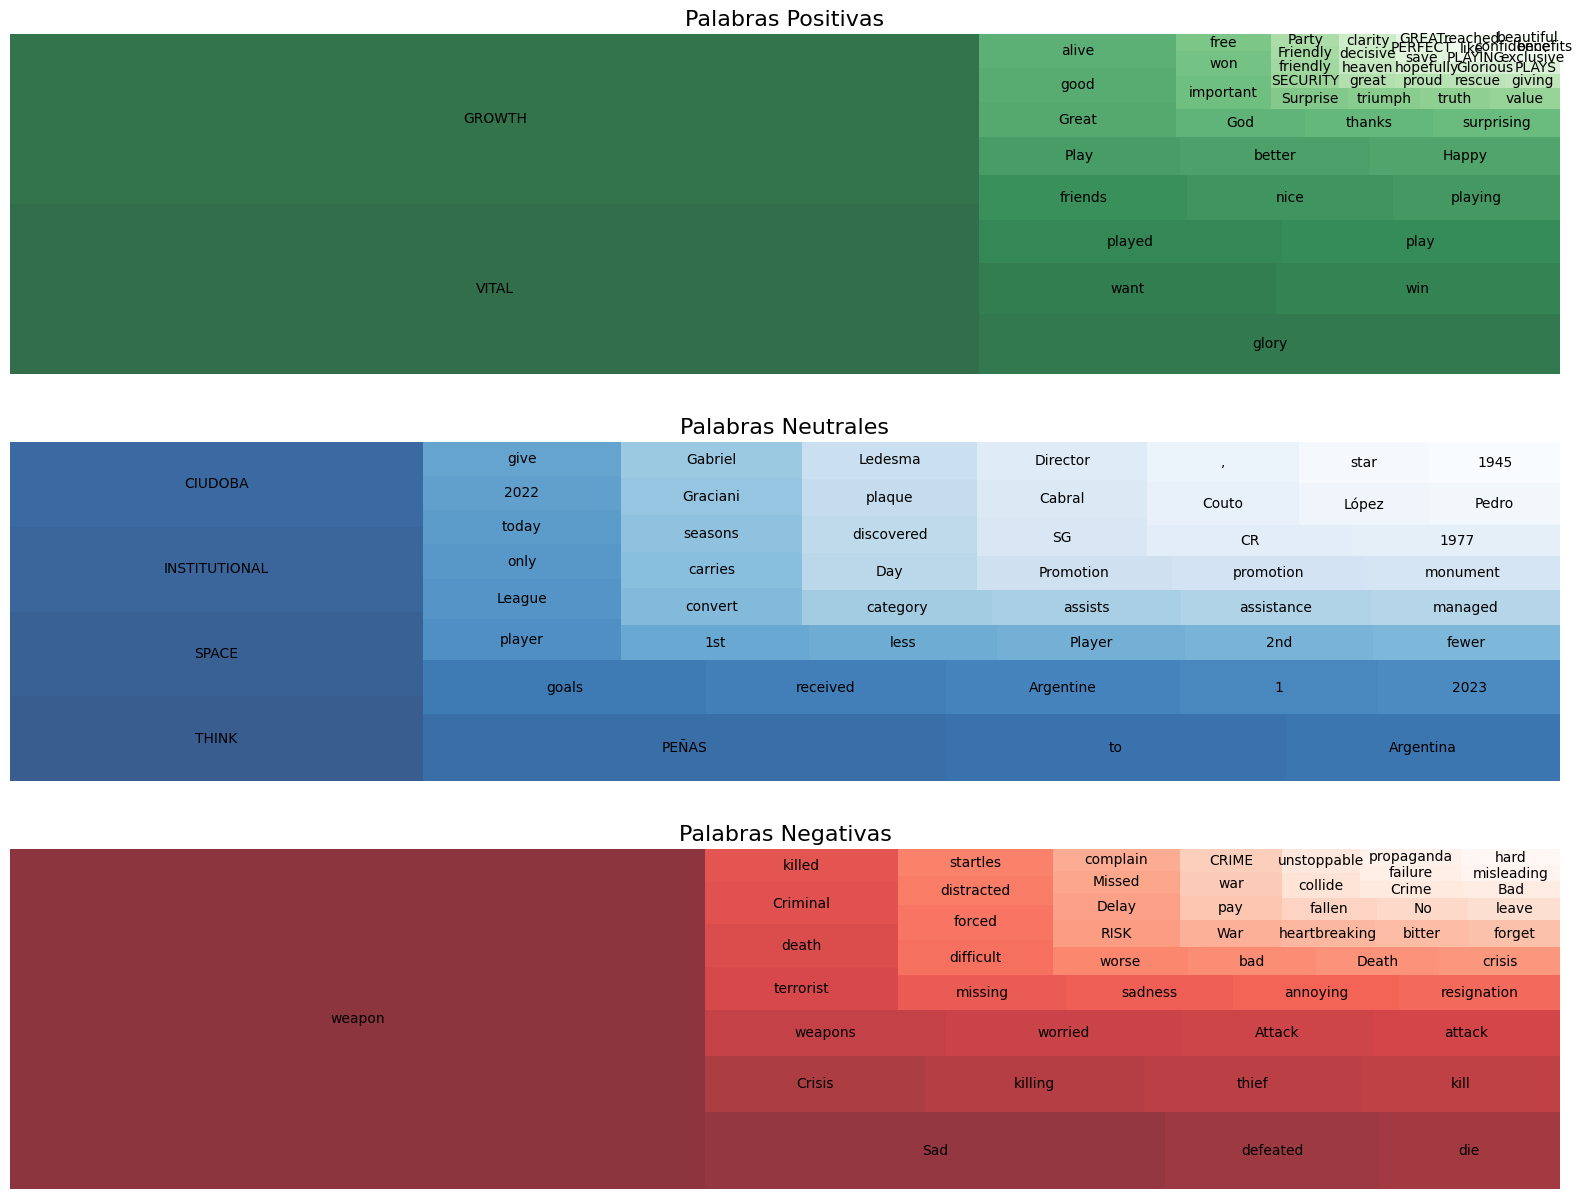

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
import squarify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Leer el archivo CSV
#df = pd.read_csv('Sentiment.csv')

# Instanciar el analizador de sentimientos de NLTK
sia = SentimentIntensityAnalyzer()

# Definir funciones para contar palabras positivas, negativas y neutrales


def count_pos_words(text):
    tokens = nltk.word_tokenize(text)
    pos_words = [word for word in tokens if sia.polarity_scores(word)[
        'compound'] > 0]
    return pos_words


def count_neg_words(text):
    tokens = nltk.word_tokenize(text)
    neg_words = [word for word in tokens if sia.polarity_scores(word)[
        'compound'] < 0]
    return neg_words


def count_neu_words(text):
    tokens = nltk.word_tokenize(text)
    neu_words = [word for word in tokens if sia.polarity_scores(word)[
        'compound'] == 0]
    return neu_words


# Calcular el conteo de palabras positivas, negativas y neutrales para cada fila del DataFrame
df['Positive Words'] = df['Translated'].apply(count_pos_words)
df['Negative Words'] = df['Translated'].apply(count_neg_words)
df['Neutral Words'] = df['Translated'].apply(count_neu_words)

# Crear una lista de todas las palabras positivas, negativas y neutrales
all_pos_words = [word for sublist in df['Positive Words'] for word in sublist]
all_neg_words = [word for sublist in df['Negative Words'] for word in sublist]
all_neu_words = [word for sublist in df['Neutral Words'] for word in sublist]

# Crear un DataFrame con el conteo de las palabras positivas, negativas y neutrales
pos_word_count = pd.Series(all_pos_words).value_counts().reset_index()
pos_word_count.columns = ['Word', 'Count']

neg_word_count = pd.Series(all_neg_words).value_counts().reset_index()
neg_word_count.columns = ['Word', 'Count']

neu_word_count = pd.Series(all_neu_words).value_counts().reset_index()
neu_word_count.columns = ['Word', 'Count']

# Crear los cmap para cada tipo de palabra
pos_cmap = plt.cm.get_cmap('Greens')
neg_cmap = plt.cm.get_cmap('Reds')
neu_cmap = plt.cm.get_cmap('Blues')

# Crear un subconjunto de las 10 palabras más comunes de cada tipo de palabra
top_pos_words = pos_word_count.head(50)
top_neg_words = neg_word_count.head(50)
top_neu_words = neu_word_count.head(50)

# Crear los treemaps para cada tipo de palabra
fig, axes = plt.subplots(3, 1, figsize=(20, 15))

# Treemap para las palabras positivas
squarify.plot(sizes=top_pos_words['Count'], label=top_pos_words['Word'], alpha=0.8,
              color=pos_cmap(np.flip(np.arange(len(top_pos_words)) / len(top_pos_words))), ax=axes[0])
axes[0].set_title('Palabras Positivas', fontsize=16)
axes[0].axis('off')

# Treemap para las palabras neutrales
squarify.plot(sizes=top_neu_words['Count'], label=top_neu_words['Word'], alpha=0.8,
              color=neu_cmap(np.flip(np.arange(len(top_neu_words)) / len(top_neu_words))), ax=axes[1])
axes[1].set_title('Palabras Neutrales', fontsize=16)
axes[1].axis('off')

# Treemap para las palabras negativas
squarify.plot(sizes=top_neg_words['Count'], label=top_neg_words['Word'], alpha=0.8,
              color=neg_cmap(np.flip(np.arange(len(top_neg_words)) / len(top_neg_words))), ax=axes[2])
axes[2].set_title('Palabras Negativas', fontsize=16)
axes[2].axis('off')

# Mostrar la figura con todos los treemaps
plt.show()